# GENESIS - Faraday Rocketry UPV - 2023

Launched at EuRoC'23, having a total success in their flight. The trajectory was nominal through the whole flight, which allowed the team to win the award for 3km flight. 
Permission to use flight data given by Nacho Coello, 2024.

These results were extracted out of the flight card:

1. Team number: `11`
2. Launch date: `October 12th, 2023. Around 14hrs local time`
3. Last simulated apogee before flight: `3076 m` 
4. Official recorded apogee: `2916 m`

The relative error of altitude apogee is only `5.2%`

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2023-10-12 13:00:00 UTC | 2023-10-12 14:00:00 Portugal
Launch Site Latitude: 39.38895°
Launch Site Longitude: -8.28837°
Reference Datum: WGS84
Launch Site UTM coordinates: 44461.73 W    4373301.99 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 160.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2023-10-12 08:00:00 to 2023-10-15 18:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -7.0°

Surface Atmospheric Conditions

Surface Wind Speed: 193.47 m/s
Surface Wind Direction: 13.47°
Surface Wind Heading: 2.95°
Surface Pressure: 999.67 hPa
Surface Temperature: 303.08 K
Surface Air Density: 1.149 kg/m³
Surface Speed of Sound: 349.00 m/s


Earth Model D

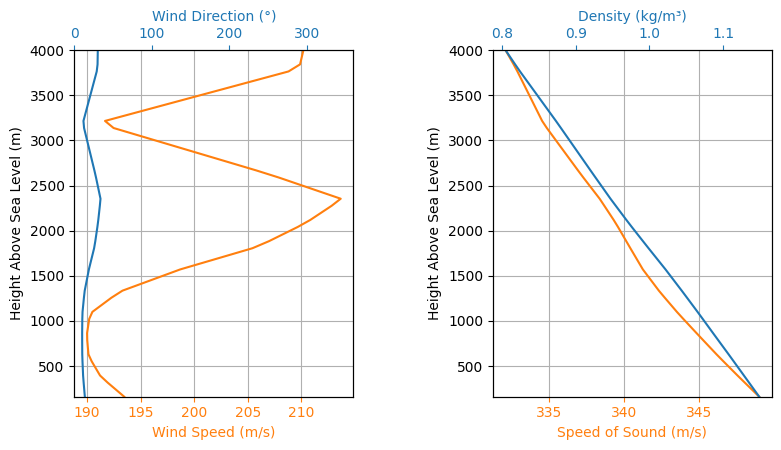

In [17]:
env = Environment(
    gravity=9.80665,
    date=(2023, 10, 12, 14),
    latitude=39.38895,
    longitude=-8.28837,
    elevation=160,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [33]:
ProL995 = SolidMotor(
    thrust_source="../../data/motors/cesaroni/Cesaroni_3618L995-P.eng",
    burn_time=3.8,
    grain_number=3,
    grain_density=1815,
    grain_initial_inner_radius=0.015,
    grain_outer_radius=0.033,
    grain_initial_height=0.12,
    nozzle_radius=0.042354,
    throat_radius=0.00925,
    grain_separation=0.005,
    grains_center_of_mass_position=0.243,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.895,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.042354 m
Nozzle Throat Radius: 0.00925 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.8 s
Total Propellant Mass: 1.774 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2039.968 m/s
Average Thrust: 952.100 N
Maximum Thrust: 1280.0 N at 1.2 s after ignition.
Total Impulse: 3617.980 Ns



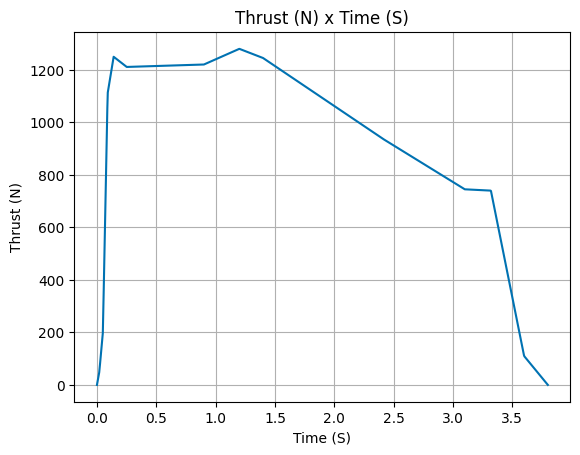

In [34]:
ProL995.info()

## Rocket and Aerodynamic surfaces

In [35]:
GENESIS = Rocket(
    radius=0.047,
    mass=9.214,
    inertia=(7.5046, 7.5046, 0.042241),
    center_of_mass_without_motor=0.895,
    power_off_drag="../../data/rockets/genesis/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/genesis/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

GENESIS.set_rail_buttons(0.98, 0.095)

GENESIS.add_motor(ProL995, position=0.0)

In [36]:
NoseCone = GENESIS.add_nose(length=0.27, kind="vonKarman", position=2.372)

FinSet = GENESIS.add_trapezoidal_fins(
    n=4,
    span=0.105,
    root_chord=0.2,
    tip_chord=0.11,
    position=0.25,
)

In [37]:
Drogue = GENESIS.add_parachute(
    name="Drogue",
    cd_s=0.285005285533666,
    trigger="apogee",
    sampling_rate=105,
    lag=1,
    noise=(0, 8.3, 0.5),
)

Main = GENESIS.add_parachute(
    name="Main",
    cd_s=1.1,
    trigger=870,
    sampling_rate=105,
    lag=1,
    noise=(0, 8.3, 0.5),
)

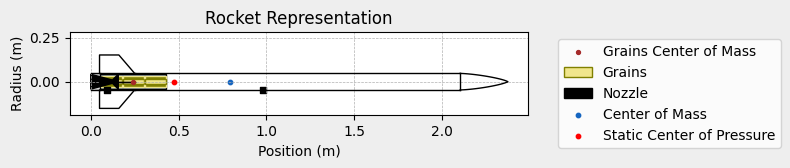

In [38]:
GENESIS.draw()

## Flight Simulation Data

In [39]:
test_flight = Flight(
    rocket=GENESIS, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 24.273 s
Apogee Altitude: 3236.446 m (ASL) | 3076.446 m (AGL)
Apogee Freestream Speed: 27.545 m/s
Apogee X position: 405.433 m
Apogee Y position: -596.882 m
Apogee latitude: 39.3835808°
Apogee longitude: -8.2836515°


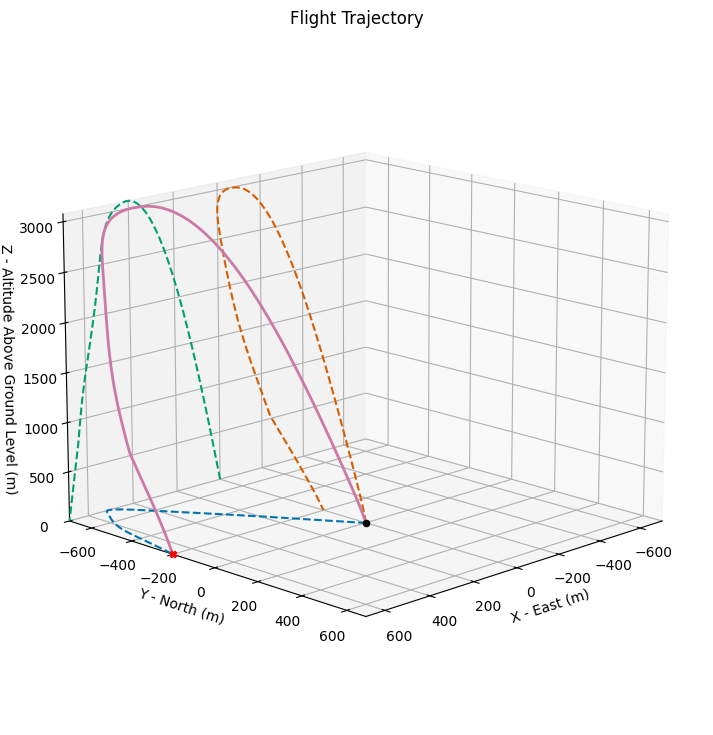

In [40]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [41]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter

columns_map = {
    "ts": "time",
    "filtered_altitude_AGL": "altitude",
    "filtered_acceleration": "az",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/genesis/flight_data_faraday.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'az']


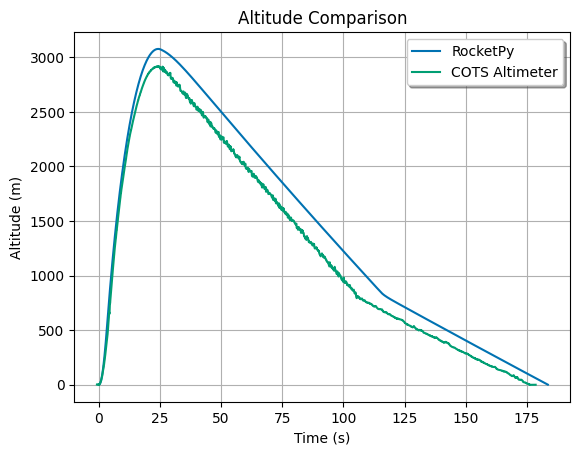

In [42]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)